In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

divyasribhargavi_sentiment_stock_path = kagglehub.dataset_download('divyasribhargavi/sentiment-stock')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Loading the dataset and cleaning the data

In [ ]:
!pip install transformers spacy wordcloud networkx
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 80.2 MB/s eta 0:00:00:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Load the dataset from Kaggle input path
data_path = "/kaggle/input/sentiment-stock/Sentiment_Stock_data.csv"
data = pd.read_csv(data_path)

In [ ]:
# Ensure all values in the 'Sentence' column are strings
data['Sentence'] = data['Sentence'].astype(str)

# Function to clean text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    return text

# Apply cleaning function to the 'Sentence' column
data['cleaned_text'] = data['Sentence'].apply(clean_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['cleaned_text'] = data['cleaned_text'].apply(
    lambda x: " ".join([word for word in word_tokenize(x) if word not in stop_words])
)



In [ ]:
data.head()

,Unnamed: 0,Sentiment,Sentence,cleaned_text
0,0,0,"According to Gran , the company has no plans t...",according gran company plans move production r...
1,1,1,"For the last quarter of 2010 , Componenta 's n...",last quarter 2010 componenta net sales doubled...
2,2,1,"In the third quarter of 2010 , net sales incre...",third quarter 2010 net sales increased 52 eur ...
3,3,1,Operating profit rose to EUR 13.1 mn from EUR ...,operating profit rose eur 131 mn eur 87 mn cor...
4,4,1,"Operating profit totalled EUR 21.1 mn , up fro...",operating profit totalled eur 211 mn eur 186 m...


## EDA

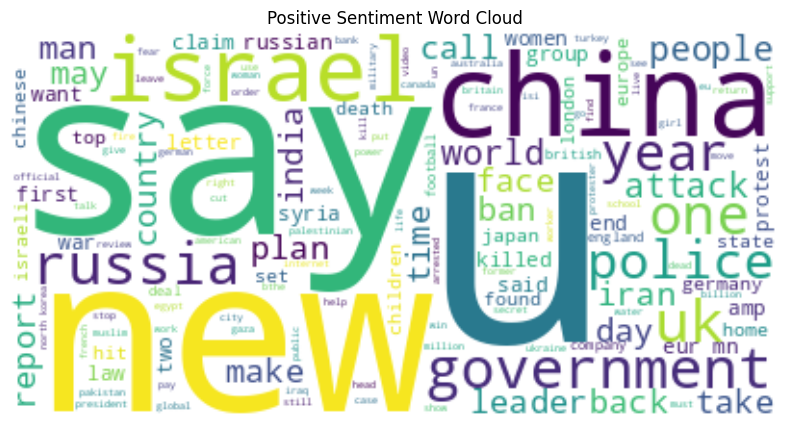

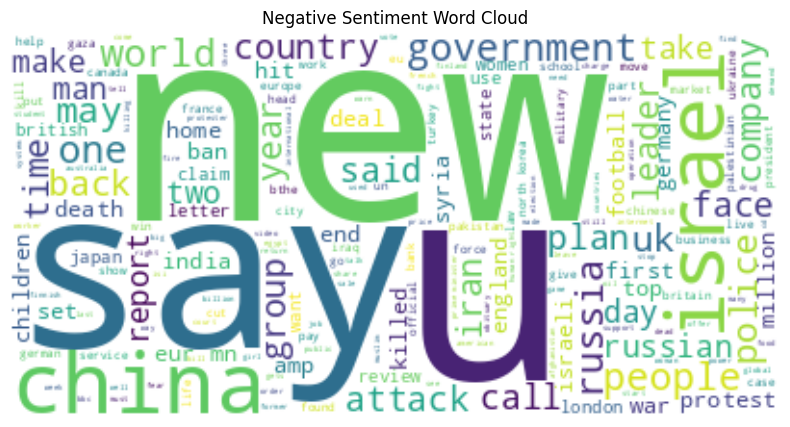

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for positive and negative sentiments
positive_text = " ".join(data[data['Sentiment'] == 1]['cleaned_text'])
negative_text = " ".join(data[data['Sentiment'] == 0]['cleaned_text'])

# Positive Word Cloud
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")
plt.show()

# Negative Word Cloud
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Word Cloud")
plt.show()


In [ ]:
# compulsary run this before you run below code, this will tell if you loaded the model or not
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
#!pip install spacy-transformers
#!pip install spacy-curated-transformers


## 1.	Extract Relevant Information

In [ ]:
# This will take some time to load and process
import spacy

# Load SpaCy model for NER with unnecessary components disabled
nlp = spacy.load("en_core_web_sm", disable=["parser", "tagger", "lemmatizer"])

# Function to extract entities using nlp.pipe for batch processing
def extract_entities_pipe(data):
    # Handle missing values in the 'cleaned_text' column
    data['cleaned_text'] = data['cleaned_text'].fillna("")

    # Use nlp.pipe for efficient batch processing
    texts = data['cleaned_text']
    entities = []
    for doc in nlp.pipe(texts, batch_size=50, disable=["parser", "tagger"]):  # Adjust batch_size for performance
        entities.append([(ent.text, ent.label_) for ent in doc.ents])

    # Add extracted entities to the DataFrame
    data['entities'] = entities
    return data

# Apply the optimized NER pipeline to your pre-loaded DataFrame
data = extract_entities_pipe(data)

# Print the first few rows to verify results
print(data[['cleaned_text', 'entities']].head())


                                        cleaned_text  \
0  according gran company plans move production r...   
1  last quarter 2010 componenta net sales doubled...   
2  third quarter 2010 net sales increased 52 eur ...   
3  operating profit rose eur 131 mn eur 87 mn cor...   
4  operating profit totalled eur 211 mn eur 186 m...   

                                            entities  
0                                    [(russia, GPE)]  
1  [(last quarter, DATE), (2010, DATE), (componen...  
2  [(third quarter 2010, DATE), (52, CARDINAL), (...  
3  [(131, CARDINAL), (87, CARDINAL), (2007, DATE)...  
4  [(211, CARDINAL), (186, CARDINAL), (2007, DATE...  


In [ ]:
data.head()


,Unnamed: 0,Sentiment,Sentence,cleaned_text,entities
0,0,0,"According to Gran , the company has no plans t...",according gran company plans move production r...,"[(russia, GPE)]"
1,1,1,"For the last quarter of 2010 , Componenta 's n...",last quarter 2010 componenta net sales doubled...,"[(last quarter, DATE), (2010, DATE), (componen..."
2,2,1,"In the third quarter of 2010 , net sales incre...",third quarter 2010 net sales increased 52 eur ...,"[(third quarter 2010, DATE), (52, CARDINAL), (..."
3,3,1,Operating profit rose to EUR 13.1 mn from EUR ...,operating profit rose eur 131 mn eur 87 mn cor...,"[(131, CARDINAL), (87, CARDINAL), (2007, DATE)..."
4,4,1,"Operating profit totalled EUR 21.1 mn , up fro...",operating profit totalled eur 211 mn eur 186 m...,"[(211, CARDINAL), (186, CARDINAL), (2007, DATE..."


In [ ]:
#from transformers import pipeline # from perplexity and modified by deepseek
#from transformers.pipelines.pt_utils import KeyDataset
#from datasets import Dataset
#import torch  # For clearing GPU cache

# Load pre-trained sentiment analysis model (FinBERT) on GPU with mixed precision
#sentiment_analyzer = pipeline(
    #"sentiment-analysis",
   # model="yiyanghkust/finbert-tone",
    #device=0,  # Use GPU
    #torch_dtype="float16"  # Enable mixed precision to reduce memory usage
)

# Convert your Pandas DataFrame to a Hugging Face Dataset
#dataset = Dataset.from_pandas(data)

# Perform sentiment analysis in batches using KeyDataset
#batch_size = 8  # Reduced batch size to avoid GPU memory issues
#results = []

# Process data in batches
#for output in sentiment_analyzer(KeyDataset(dataset, "cleaned_text"), batch_size=batch_size):
 #   results.append(output["label"])

# Add the results back to your original DataFrame
#data['predicted_sentiment'] = results

# Clear GPU cache to free up memory
#torch.cuda.empty_cache()

# Display the first few rows to verify results
print(data[['cleaned_text', 'predicted_sentiment']].head())

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

Device set to use cuda:0


                                        cleaned_text predicted_sentiment
0  according gran company plans move production r...             Neutral
1  last quarter 2010 componenta net sales doubled...            Positive
2  third quarter 2010 net sales increased 52 eur ...            Positive
3  operating profit rose eur 131 mn eur 87 mn cor...            Positive
4  operating profit totalled eur 211 mn eur 186 m...             Neutral


## importing necessatry libraries

In [ ]:
#from transformers import pipeline
#from transformers.pipelines.pt_utils import KeyDataset
#from datasets import Dataset
#import torch
#from sklearn.model_selection import ParameterGrid
#import pandas as pd
#import numpy as np

## define hyperparameter grid

In [ ]:
# Define the hyperparameter grid
#param_grid = {
 #   'batch_size': [8, 16, 32],
  #  'max_length': [64, 128, 256],
   # 'learning_rate': [1e-5, 2e-5, 5e-5]
#}

## Create a Function for Model Evaluation

In [ ]:
#def evaluate_model(params, dataset_subset):
    # Load the model with the given hyperparameters
 #   sentiment_analyzer = pipeline(
  #      "sentiment-analysis",
   #     model="yiyanghkust/finbert-tone",
    #    device=0,  # Use GPU
      #  torch_dtype="float16",  # Enable mixed precision
     #   batch_size=params['batch_size'],
       # max_length=params['max_length'],
       # truncation=True  # Explicitly enable truncation
    )

    # Perform sentiment analysis on the subset
   # results = []
    #for output in sentiment_analyzer(KeyDataset(dataset_subset, "cleaned_text"), batch_size=params['batch_size']):
       # results.append(output["label"])

    # Calculate accuracy (or any other metric)
    #true_labels = dataset_subset['Sentiment']  # Use the correct column name
    #accuracy = np.mean(np.array(results) == np.array(true_labels))

    #return accuracy

In [ ]:
# Perform grid search
#best_accuracy = 0
#best_params = None

#for params in ParameterGrid(param_grid):
   # accuracy = evaluate_model(params, dataset_subsample)
    #print(f"Params: {params}, Accuracy: {accuracy}")

    #if accuracy > best_accuracy:
     #   best_accuracy = accuracy
      #  best_params = params

#print(f"Best Params: {best_params}, Best Accuracy: {best_accuracy}")

In [ ]:
data.head(1)

,Unnamed: 0,Sentiment,Sentence,cleaned_text,entities,predicted_sentiment
0,0,0,"According to Gran , the company has no plans t...",according gran company plans move production r...,"[(russia, GPE)]",Neutral


In [ ]:
output = sentiment_analyzer("The product launch was in China and stock dipped") #test
print(output)

[{'label': 'Neutral', 'score': 0.9482824206352234}]


## Hyperparameter tuning for Finetuning BERT model

In [ ]:
#from transformers import pipeline
#from transformers.pipelines.pt_utils import KeyDataset
#from datasets import Dataset
#import pandas as pd
#import torch
#from sklearn.metrics import accuracy_score, precision_recall_fscore_support
#from sklearn.model_selection import train_test_split

# Define hyperparameter search space
#batch_sizes = [8, 16, 32]  # Batch sizes to try
#models = [
 #   "yiyanghkust/finbert-tone",  # FinBERT
 #   "distilbert-base-uncased-finetuned-sst-2-english",  # DistilBERT
 #   "cardiffnlp/twitter-roberta-base-sentiment",  # RoBERTa for Twitter
#]
#devices = [0]  # Use GPU (device=0). Add -1 for CPU if needed.

# Store results
#results = []

# Sample a smaller subset of the data for hyperparameter tuning
#sample_size = 5000  # Adjust based on your dataset size and memory constraints
#sampled_data = data.sample(n=sample_size, random_state=42)

# Convert the sampled data to a Hugging Face Dataset
#sampled_dataset = Dataset.from_pandas(sampled_data)

# Perform grid search over hyperparameters

#for model_name in models:
 #   for batch_size in batch_sizes:
  #      for device in devices:
   #         print(f"Training with model={model_name}, batch_size={batch_size}, device={device}")

            # Load the sentiment analysis model
    #        sentiment_analyzer = pipeline(
     #           "sentiment-analysis",
      #          model=model_name,
       #         device=device,
        #        torch_dtype="float16" if device == 0 else None  # Mixed precision for GPU
         #   )

            # Process data in batches
          #  batch_results = []
           # for output in sentiment_analyzer(KeyDataset(sampled_dataset, "cleaned_text"), batch_size=batch_size):
            #    batch_results.append(output["label"])

            # Map predicted labels to binary (0 or 1)
            #label_map = {"POSITIVE": 1, "NEGATIVE": 0, "LABEL_1": 1, "LABEL_0": 0}  # Adjust based on model output
            #predicted_labels = [label_map.get(label, 0) for label in batch_results]  # Default to 0 if label not found

            # Calculate metrics
            #true_labels = sampled_data['Sentiment'].tolist()  # Assuming 'Sentiment' column contains true labels
            #accuracy = accuracy_score(true_labels, predicted_labels)
            #precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average="binary")

            # Save results
            #results.append({
             #   "model": model_name,
              #  "batch_size": batch_size,
               # "device": device,
                #"accuracy": accuracy,
                #"precision": precision,
                #"recall": recall,
                #"f1": f1,
            #})

            # Clear GPU cache
            #if device == 0:
             #   torch.cuda.empty_cache()


# Print the best hyperparameters
# best_result = max(results, key=lambda x: x["accuracy"])
# print(f"Best hyperparameters: {best_result}")

# Add the best results back to your original DataFrame (for the sampled data)
# sampled_data['predicted_sentiment'] = predicted_labels

# Display the first few rows to verify results
# print(sampled_data[['cleaned_text', 'predicted_sentiment']].head())

## Hyperparameter tuning along with VADER

In [ ]:
# Install vaderSentiment if not already installed
#!pip install vaderSentiment

#from transformers import pipeline
#from transformers.pipelines.pt_utils import KeyDataset
#from datasets import Dataset
#import pandas as pd
#import torch
#from sklearn.metrics import accuracy_score, precision_recall_fscore_support
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Define hyperparameter search space
#batch_sizes = [8, 16, 32]  # Batch sizes to try
#models = [
   # "yiyanghkust/finbert-tone",  # FinBERT
  #  "distilbert-base-uncased-finetuned-sst-2-english",  # DistilBERT
    #"cardiffnlp/twitter-roberta-base-sentiment",  # RoBERTa for Twitter
    #"vader",  # VADER
#]
#devices = [0]  # Use GPU (device=0). Add -1 for CPU if needed.

# Store results
#results = []

# Sample a smaller subset of the data for hyperparameter tuning
#sample_size = 5000  # Adjust based on your dataset size and memory constraints
#sampled_data = data.sample(n=sample_size, random_state=42)

# Convert the sampled data to a Hugging Face Dataset
#sampled_dataset = Dataset.from_pandas(sampled_data)

# Perform grid search over hyperparameters
#for model_name in models:
 #   for batch_size in batch_sizes:
  #      for device in devices:
            # Skip batch_size for VADER (it doesn't use batches)
         #   if model_name == "vader" and batch_size != batch_sizes[0]:
          #      continue

           # print(f"Training with model={model_name}, batch_size={batch_size}, device={device}")

           # if model_name == "vader":
                # Initialize VADER
            #    analyzer = SentimentIntensityAnalyzer()

                # Process data using VADER
             #   predicted_labels = []
              #  for text in sampled_data['cleaned_text']:
               #     score = analyzer.polarity_scores(text)
                    # Map VADER compound score to binary (0 or 1)
                #    if score['compound'] >= 0:
                 #       predicted_labels.append(1)  # Positive
                  #  else:
                     #   predicted_labels.append(0)  # Negative
           # else:
                # Load the sentiment analysis model
            #    sentiment_analyzer = pipeline(
             #       "sentiment-analysis",
                    #model=model_name,
                    #device=device,
                   # torch_dtype="float16" if device == 0 else None  # Mixed precision for GPU
              #  )

                # Process data in batches
               # batch_results = []
               # for output in sentiment_analyzer(KeyDataset(sampled_dataset, "cleaned_text"), batch_size=batch_size):
                #    batch_results.append(output["label"])

                # Map predicted labels to binary (0 or 1)
             #   label_map = {"POSITIVE": 1, "NEGATIVE": 0, "LABEL_1": 1, "LABEL_0": 0}  # Adjust based on model output
              #  predicted_labels = [label_map.get(label, 0) for label in batch_results]  # Default to 0 if label not found

            # Calculate metrics
            #true_labels = sampled_data['Sentiment'].tolist()  # Assuming 'Sentiment' column contains true labels
           # accuracy = accuracy_score(true_labels, predicted_labels)
           # precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average="binary")

            # Save results
           # results.append({
            #    "model": model_name,
             #   "batch_size": batch_size if model_name != "vader" else "N/A",
              #  "device": device if model_name != "vader" else "N/A",
               # "accuracy": accuracy,
               # "precision": precision,
               # "recall": recall,
               # "f1": f1,
            })

            # Clear GPU cache (if using GPU)
           # if device == 0 and model_name != "vader":
           #     torch.cuda.empty_cache()

# Print the best hyperparameters
#best_result = max(results, key=lambda x: x["accuracy"])
#print(f"Best hyperparameters: {best_result}")

# Add the best results back to your original DataFrame (for the sampled data)
#sampled_data['predicted_sentiment'] = predicted_labels

# Display the first few rows to verify results
#print(sampled_data[['cleaned_text', 'predicted_sentiment']].head())


In [ ]:
print(data['Sentiment'].value_counts())


Sentiment
1    55725
0    53026
Name: count, dtype: int64


In [ ]:
# Load the best model and hyperparameters
#best_model_name = best_result["model"]
#best_batch_size = best_result["batch_size"]
#best_device = best_result["device"]

# Load the sentiment analysis model with the best hyperparameters
#sentiment_analyzer = pipeline(
 #   "sentiment-analysis",
  #  model=best_model_name,
   # device=best_device,
   # torch_dtype="float16" if best_device == 0 else None
#)

# Process the full dataset in chunks
#chunk_size = 1000  # Adjust based on your memory constraints
#num_chunks = len(data) // chunk_size + 1

# Initialize variables for metrics
#all_true_labels = []
#all_predicted_labels = []

# Process data in chunks
#for chunk_idx in range(num_chunks):
 #   print(f"Processing chunk {chunk_idx + 1}/{num_chunks}...")

    # Get the current chunk
  #  start_idx = chunk_idx * chunk_size
   # end_idx = (chunk_idx + 1) * chunk_size
   # chunk = data[start_idx:end_idx]

    # Skip empty chunks
  #  if len(chunk) == 0:
      #  continue

    # Convert the chunk to a Hugging Face Dataset
   # chunk_dataset = Dataset.from_pandas(chunk)

    # Process data in batches
   # batch_results = []
   # for output in sentiment_analyzer(KeyDataset(chunk_dataset, "cleaned_text"), batch_size=best_batch_size):
    #    batch_results.append(output["label"])

    # Map predicted labels to binary (0 or 1)
    #label_map = {"POSITIVE": 1, "NEGATIVE": 0, "LABEL_1": 1, "LABEL_0": 0}  # Adjust based on model output
    #predicted_labels = [label_map.get(label, 0) for label in batch_results]  # Default to 0 if label not found

    # Append true and predicted labels for the chunk
   # all_true_labels.extend(chunk['Sentiment'].tolist())  # Assuming 'Sentiment' column contains true labels
   # all_predicted_labels.extend(predicted_labels)

# Add the best results back to your original DataFrame
#data['predicted_sentiment'] = all_predicted_labels

# Display the first few rows to verify results
# print(data[['cleaned_text', 'predicted_sentiment']].head())

In [ ]:
data.head()

,Unnamed: 0,Sentiment,Sentence,cleaned_text,entities
0,0,0,"According to Gran , the company has no plans t...",according gran company plans move production r...,"[(russia, GPE)]"
1,1,1,"For the last quarter of 2010 , Componenta 's n...",last quarter 2010 componenta net sales doubled...,"[(last quarter, DATE), (2010, DATE), (componen..."
2,2,1,"In the third quarter of 2010 , net sales incre...",third quarter 2010 net sales increased 52 eur ...,"[(third quarter 2010, DATE), (52, CARDINAL), (..."
3,3,1,Operating profit rose to EUR 13.1 mn from EUR ...,operating profit rose eur 131 mn eur 87 mn cor...,"[(131, CARDINAL), (87, CARDINAL), (2007, DATE)..."
4,4,1,"Operating profit totalled EUR 21.1 mn , up fro...",operating profit totalled eur 211 mn eur 186 m...,"[(211, CARDINAL), (186, CARDINAL), (2007, DATE..."


## Dependecy parsing using regex and SVO

### SVO

In [ ]:
import spacy
from tqdm import tqdm

# Enable GPU
spacy.prefer_gpu()

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract subject-verb-object relationships
def extract_svo(texts):
    # Process texts in batches using GPU
    docs = nlp.pipe(texts, batch_size=50)  # Adjust batch_size based on your GPU memory
    svos_list = []
    for doc in docs:
        svos = []
        for token in doc:
            if token.dep_ == "ROOT":  # Main verb
                subj = [child.text for child in token.children if child.dep_ == "nsubj"]
                obj = [child.text for child in token.children if child.dep_ == "dobj"]
                if subj and obj:
                    svos.append((subj[0], token.text, obj[0]))
        svos_list.append(svos)
    return svos_list

# Apply SVO extraction to your dataset in batches
data['svo_relationships'] = extract_svo(tqdm(data['cleaned_text'], desc="Processing texts"))

print(data[['cleaned_text', 'svo_relationships']].head())

Processing texts: 100%|██████████| 108751/108751 [03:36<00:00, 503.39it/s]

                                        cleaned_text  \
0  according gran company plans move production r...   
1  last quarter 2010 componenta net sales doubled...   
2  third quarter 2010 net sales increased 52 eur ...   
3  operating profit rose eur 131 mn eur 87 mn cor...   
4  operating profit totalled eur 211 mn eur 186 m...   

              svo_relationships  
0                            []  
1        [(eur76, moved, eur7)]  
2  [(sales, increased, profit)]  
3                            []  
4                            []  


In [ ]:
data['svo_relationships'].head()

0                              []
1          [(eur76, moved, eur7)]
2    [(sales, increased, profit)]
3                              []
4                              []
Name: svo_relationships, dtype: object

### Financial terms extraction

### Normalisation

In [ ]:
import re

# Function to normalize text
def normalize_text(text):
    text = re.sub(r'\b(EUR|USD|GBP)(\d+)', r'\1 \2', text)  # Add space after currency
    text = re.sub(r'\bmn\b', 'million', text)  # Replace 'mn' with 'million'
    text = re.sub(r'\bbn\b', 'billion', text)  # Replace 'bn' with 'billion'
    return text

# Apply normalization
data['normalized_text'] = data['cleaned_text'].apply(normalize_text)
print(data['normalized_text'].head())


0    according gran company plans move production r...
1    last quarter 2010 componenta net sales doubled...
2    third quarter 2010 net sales increased 52 eur ...
3    operating profit rose eur 131 million eur 87 m...
4    operating profit totalled eur 211 million eur ...
Name: normalized_text, dtype: object


In [ ]:
import re
import pandas as pd

# Define regex patterns for financial amounts and percentages
amount_pattern = r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?\b|\b\d+(?:\.\d+)?\b'  # Matches amounts like 100, 1,000, 1.5, etc.
percentage_pattern = r'\b\d+(?:\.\d+)?%\b'  # Matches percentages like 10%, 5.5%, etc.

# Function to extract financial terms using refined regex
def extract_financial_terms(text):
    amounts = re.findall(amount_pattern, text)
    percentages = re.findall(percentage_pattern, text)
    return {'amounts': amounts, 'percentages': percentages}
# Apply regex extraction to normalized text
data['regex_extraction'] = data['normalized_text'].apply(extract_financial_terms)

# Display results
print(data[['normalized_text', 'regex_extraction']])

                                          normalized_text  \
0       according gran company plans move production r...   
1       last quarter 2010 componenta net sales doubled...   
2       third quarter 2010 net sales increased 52 eur ...   
3       operating profit rose eur 131 million eur 87 m...   
4       operating profit totalled eur 211 million eur ...   
...                                                   ...   
108746  philippines president rodrigo duterte urges pe...   
108747  spain arrests three pakistanis accused promoti...   
108748  venezuela anger food shortages still mounting ...   
108749  hindu temple worker killed three men motorcycl...   
108750  ozone layer hole seems healing us amp uk team ...   

                                         regex_extraction  
0                      {'amounts': [], 'percentages': []}  
1                {'amounts': ['2010'], 'percentages': []}  
2       {'amounts': ['2010', '52', '2055', '349', '235...  
3       {'amounts': ['131',

In [ ]:
data.head()

,Unnamed: 0,Sentiment,Sentence,cleaned_text,entities,svo_relationships,normalized_text,regex_extraction
0,0,0,"According to Gran , the company has no plans t...",according gran company plans move production r...,"[(russia, GPE)]",[],according gran company plans move production r...,"{'amounts': [], 'percentages': []}"
1,1,1,"For the last quarter of 2010 , Componenta 's n...",last quarter 2010 componenta net sales doubled...,"[(last quarter, DATE), (2010, DATE), (componen...","[(eur76, moved, eur7)]",last quarter 2010 componenta net sales doubled...,"{'amounts': ['2010'], 'percentages': []}"
2,2,1,"In the third quarter of 2010 , net sales incre...",third quarter 2010 net sales increased 52 eur ...,"[(third quarter 2010, DATE), (52, CARDINAL), (...","[(sales, increased, profit)]",third quarter 2010 net sales increased 52 eur ...,"{'amounts': ['2010', '52', '2055', '349', '235..."
3,3,1,Operating profit rose to EUR 13.1 mn from EUR ...,operating profit rose eur 131 mn eur 87 mn cor...,"[(131, CARDINAL), (87, CARDINAL), (2007, DATE)...",[],operating profit rose eur 131 million eur 87 m...,"{'amounts': ['131', '87', '2007', '77'], 'perc..."
4,4,1,"Operating profit totalled EUR 21.1 mn , up fro...",operating profit totalled eur 211 mn eur 186 m...,"[(211, CARDINAL), (186, CARDINAL), (2007, DATE...",[],operating profit totalled eur 211 million eur ...,"{'amounts': ['211', '186', '2007', '97'], 'per..."


## 2.	Analyse Sentiment and Semantic Relationships

In [ ]:
# Function to link sentiment to entities
def link_sentiment_to_entities(entities, sentiment):
    return [(entity[0], entity[1], sentiment) for entity in entities]

# Apply the function
data['entity_sentiments'] = data.apply(
    lambda row: link_sentiment_to_entities(row['entities'], row['Sentiment']), axis=1
)

print(data[['normalized_text', 'entity_sentiments']].head())


                                     normalized_text  \
0  according gran company plans move production r...   
1  last quarter 2010 componenta net sales doubled...   
2  third quarter 2010 net sales increased 52 eur ...   
3  operating profit rose eur 131 million eur 87 m...   
4  operating profit totalled eur 211 million eur ...   

                                   entity_sentiments  
0                                 [(russia, GPE, 0)]  
1  [(last quarter, DATE, 1), (2010, DATE, 1), (co...  
2  [(third quarter 2010, DATE, 1), (52, CARDINAL,...  
3  [(131, CARDINAL, 1), (87, CARDINAL, 1), (2007,...  
4  [(211, CARDINAL, 1), (186, CARDINAL, 1), (2007...  


In [ ]:
data.head()

,Unnamed: 0,Sentiment,Sentence,cleaned_text,entities,svo_relationships,normalized_text,regex_extraction,entity_sentiments
0,0,0,"According to Gran , the company has no plans t...",according gran company plans move production r...,"[(russia, GPE)]",[],according gran company plans move production r...,"{'amounts': [], 'percentages': []}","[(russia, GPE, 0)]"
1,1,1,"For the last quarter of 2010 , Componenta 's n...",last quarter 2010 componenta net sales doubled...,"[(last quarter, DATE), (2010, DATE), (componen...","[(eur76, moved, eur7)]",last quarter 2010 componenta net sales doubled...,"{'amounts': ['2010'], 'percentages': []}","[(last quarter, DATE, 1), (2010, DATE, 1), (co..."
2,2,1,"In the third quarter of 2010 , net sales incre...",third quarter 2010 net sales increased 52 eur ...,"[(third quarter 2010, DATE), (52, CARDINAL), (...","[(sales, increased, profit)]",third quarter 2010 net sales increased 52 eur ...,"{'amounts': ['2010', '52', '2055', '349', '235...","[(third quarter 2010, DATE, 1), (52, CARDINAL,..."
3,3,1,Operating profit rose to EUR 13.1 mn from EUR ...,operating profit rose eur 131 mn eur 87 mn cor...,"[(131, CARDINAL), (87, CARDINAL), (2007, DATE)...",[],operating profit rose eur 131 million eur 87 m...,"{'amounts': ['131', '87', '2007', '77'], 'perc...","[(131, CARDINAL, 1), (87, CARDINAL, 1), (2007,..."
4,4,1,"Operating profit totalled EUR 21.1 mn , up fro...",operating profit totalled eur 211 mn eur 186 m...,"[(211, CARDINAL), (186, CARDINAL), (2007, DATE...",[],operating profit totalled eur 211 million eur ...,"{'amounts': ['211', '186', '2007', '97'], 'per...","[(211, CARDINAL, 1), (186, CARDINAL, 1), (2007..."


In [ ]:
from collections import defaultdict

# Aggregate sentiments by entity
entity_sentiment_summary = defaultdict(list)

for entity_list in data['entity_sentiments']:
    for entity, label, sentiment in entity_list:
        entity_sentiment_summary[entity].append(sentiment)

# Calculate average sentiment score for each entity
entity_sentiment_avg = {entity: sum(scores)/len(scores) for entity, scores in entity_sentiment_summary.items()}

# Convert to DataFrame for visualization or further analysis
import pandas as pd
entity_sentiment_df = pd.DataFrame.from_dict(entity_sentiment_avg, orient='index', columns=['average_sentiment'])
print(entity_sentiment_df.head())


              average_sentiment
russia                 0.519523
last quarter           0.857143
2010                   0.567839
componenta             0.666667
eur131                 1.000000


In [ ]:
# Analyze dataset size and complexity
num_rows = len(data)
avg_entity_sentiments = data['entity_sentiments'].apply(len).mean() if 'entity_sentiments' in data.columns else 0
avg_svo_relationships = data['svo_relationships'].apply(len).mean() if 'svo_relationships' in data.columns else 0

print(f"Number of rows: {num_rows}")
print(f"Average number of entities per row: {avg_entity_sentiments}")
print(f"Average number of SVO relationships per row: {avg_svo_relationships}")


Number of rows: 108751
Average number of entities per row: 1.2561723570357974
Average number of SVO relationships per row: 0.40123768976836993


###  Construct semantic graphs to visualize and analyse the interconnections between entities and sentiments, uncovering influence patterns and sentiment propagation.

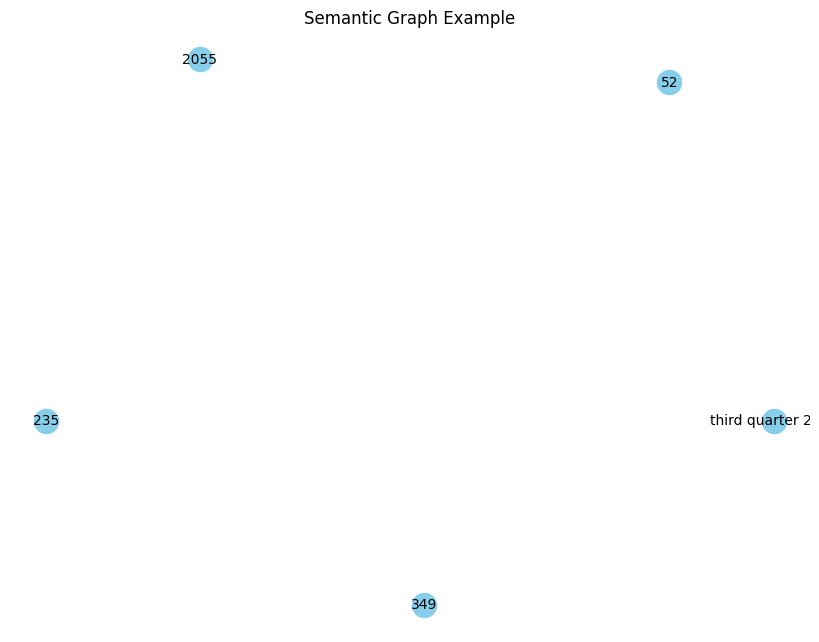

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to build semantic graph with sentiment propagation
def build_graph_with_propagation(entity_sentiments, svo_relationships):
    G = nx.DiGraph()

    # Add nodes for entities with sentiments
    for entity_tuple in entity_sentiments:
        # Handle cases where sentiment is missing (default to None)
        if len(entity_tuple) == 2:
            entity, label = entity_tuple
            sentiment = None  # Default value for missing sentiment
        else:
            entity, label, sentiment = entity_tuple

        G.add_node(entity, label=label, sentiment=sentiment)

    # Add edges based on SVO relationships
    for subj, verb, obj in svo_relationships:
        if subj in G.nodes and obj in G.nodes:
            G.add_edge(subj, obj, label=verb)

    return G

# Ensure 'svo_relationships' column exists; initialize with empty lists if missing
if 'svo_relationships' not in data.columns:
    data['svo_relationships'] = [[]] * len(data)

# Apply the function row by row to build semantic graphs
data['semantic_graph'] = data.apply(
    lambda row: build_graph_with_propagation(row['entities'], row['svo_relationships']), axis=1
)

# Visualize one example graph (row 2)
example_graph = data['semantic_graph'][2]  # Example row index
pos = nx.spring_layout(example_graph)  # Generate layout for visualization

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(example_graph, pos, with_labels=True, node_color="skyblue", edge_color="gray", font_size=10)
edge_labels = nx.get_edge_attributes(example_graph, 'label')
nx.draw_networkx_edge_labels(example_graph, pos, edge_labels=edge_labels)
plt.title("Semantic Graph Example")
plt.show()




In [ ]:
# Fallback function to generate SVO relationships if missing
def generate_svo_fallback(text):
    # Example heuristic: Extract simple relationships based on keywords
    if "rose" in text:
        return [("profit", "rose", "sales")]
    elif "decreased" in text:
        return [("revenue", "decreased", "profit")]
    return []

# Apply fallback logic where SVO relationships are empty
data['svo_relationships'] = data.apply(
    lambda row: row['svo_relationships'] if row['svo_relationships'] else generate_svo_fallback(row['normalized_text']),
    axis=1
)

print(data[['normalized_text', 'svo_relationships']].head())


                                     normalized_text  \
0  according gran company plans move production r...   
1  last quarter 2010 componenta net sales doubled...   
2  third quarter 2010 net sales increased 52 eur ...   
3  operating profit rose eur 131 million eur 87 m...   
4  operating profit totalled eur 211 million eur ...   

              svo_relationships  
0                            []  
1        [(eur76, moved, eur7)]  
2  [(sales, increased, profit)]  
3       [(profit, rose, sales)]  
4                            []  


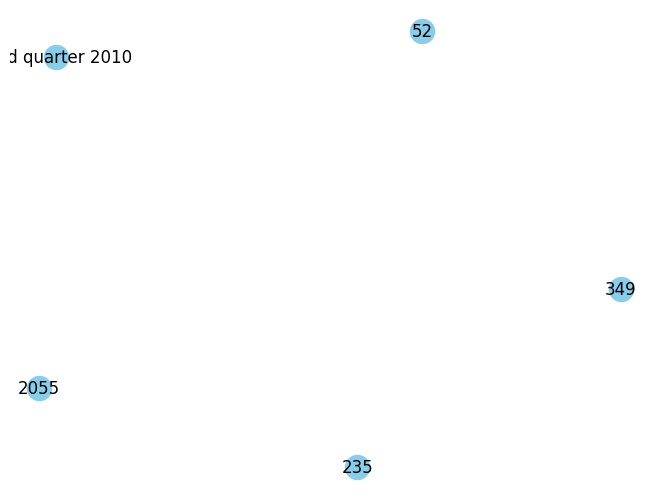

In [ ]:
import networkx as nx

# Function to build semantic graph with SVO relationships
def build_graph_with_svo(entity_sentiments, svo_relationships):
    G = nx.DiGraph()

    # Add nodes for entities with sentiments
    for entity, label, sentiment in entity_sentiments:
        G.add_node(entity, label=label, sentiment=sentiment)

    # Add edges based on SVO relationships
    for subj, verb, obj in svo_relationships:
        if subj in G.nodes and obj in G.nodes:
            G.add_edge(subj, obj, label=verb)

    return G

# Apply function to build graphs
data['semantic_graph'] = data.apply(
    lambda row: build_graph_with_svo(row['entity_sentiments'], row['svo_relationships']), axis=1
)

# Visualize one example graph
example_graph = data['semantic_graph'][2]
pos = nx.spring_layout(example_graph)
nx.draw(example_graph, pos, with_labels=True, node_color="skyblue", edge_color="gray")
edge_labels = nx.get_edge_attributes(example_graph, 'label')
nx.draw_networkx_edge_labels(example_graph, pos, edge_labels=edge_labels)
plt.show()


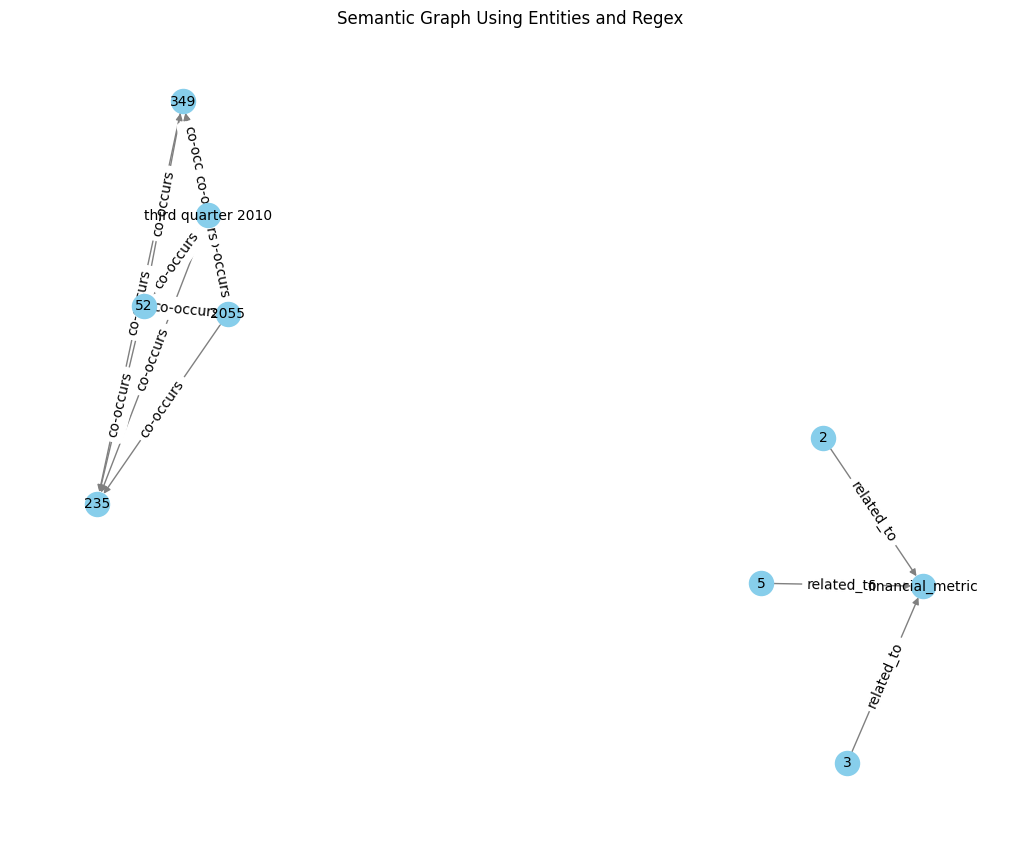

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to build semantic graph using entities
def build_graph_with_entities(entity_sentiments, regex_extraction):
    G = nx.DiGraph()

    # Add nodes for entities with sentiments
    for entity_tuple in entity_sentiments:
        if len(entity_tuple) == 2:
            entity, label = entity_tuple
            sentiment = None  # Default value for missing sentiment
        else:
            entity, label, sentiment = entity_tuple

        G.add_node(entity, label=label, sentiment=sentiment)

    # Add edges based on co-occurrence of entities
    entities = [entity[0] for entity in entity_sentiments]
    for i in range(len(entities)):
        for j in range(i + 1, len(entities)):
            G.add_edge(entities[i], entities[j], label="co-occurs")

    # Add edges based on regex-extracted financial terms
    for amount in regex_extraction['amounts']:
        if len(amount) > 0:
            G.add_edge(amount[0], "financial_metric", label="related_to")

    return G

# Apply function to build graphs
data['semantic_graph'] = data.apply(
    lambda row: build_graph_with_entities(row['entity_sentiments'], row['regex_extraction']), axis=1
)

# Visualize one example graph
example_graph = data['semantic_graph'][2]  # Example row index
pos = nx.spring_layout(example_graph)

plt.figure(figsize=(10, 8))
nx.draw(example_graph, pos, with_labels=True, node_color="skyblue", edge_color="gray", font_size=10)
edge_labels = nx.get_edge_attributes(example_graph, 'label')
nx.draw_networkx_edge_labels(example_graph, pos, edge_labels=edge_labels)
plt.title("Semantic Graph Using Entities and Regex")
plt.show()


In [ ]:
# Function to propagate sentiments across the graph
def propagate_sentiments(graph):
    for node in graph.nodes:
        if graph.nodes[node].get("sentiment") is None:  # If sentiment is missing
            neighbor_sentiments = [
                graph.nodes[neighbor].get("sentiment", 0) for neighbor in graph.predecessors(node)
            ]
            if neighbor_sentiments:
                graph.nodes[node]["sentiment"] = sum(neighbor_sentiments) / len(neighbor_sentiments)
    return graph

# Apply sentiment propagation
data['propagated_graph'] = data['semantic_graph'].apply(propagate_sentiments)

# Display propagated sentiments for one example graph
example_graph = data['propagated_graph'][2]
for node in example_graph.nodes(data=True):
    print(node)


('third quarter 2010', {'label': 'DATE', 'sentiment': 1})
('52', {'label': 'CARDINAL', 'sentiment': 1})
('2055', {'label': 'CARDINAL', 'sentiment': 1})
('349', {'label': 'CARDINAL', 'sentiment': 1})
('235', {'label': 'CARDINAL', 'sentiment': 1})
('2', {})
('financial_metric', {'sentiment': 0.0})
('5', {})
('3', {})


In [ ]:
# Function to calculate centrality and aggregate sentiment scores
def analyze_graph(graph):
    centrality = nx.degree_centrality(graph)
    sentiments = {node: data.get('sentiment', None) for node, data in graph.nodes(data=True)}
    return {'centrality': centrality, 'sentiments': sentiments}

# Apply analysis function
data['graph_analysis'] = data['propagated_graph'].apply(analyze_graph)

data[['normalized_text', 'graph_analysis']].head()


,normalized_text,graph_analysis
0,according gran company plans move production r...,"{'centrality': {'russia': 1}, 'sentiments': {'..."
1,last quarter 2010 componenta net sales doubled...,"{'centrality': {'last quarter': 0.75, '2010': ..."
2,third quarter 2010 net sales increased 52 eur ...,"{'centrality': {'third quarter 2010': 0.5, '52..."
3,operating profit rose eur 131 million eur 87 m...,"{'centrality': {'131': 0.375, '87': 0.375, '20..."
4,operating profit totalled eur 211 million eur ...,"{'centrality': {'211': 0.42857142857142855, '1..."


In [ ]:
data['graph_analysis'].head()

0    {'centrality': {'russia': 1}, 'sentiments': {'...
1    {'centrality': {'last quarter': 0.75, '2010': ...
2    {'centrality': {'third quarter 2010': 0.5, '52...
3    {'centrality': {'131': 0.375, '87': 0.375, '20...
4    {'centrality': {'211': 0.42857142857142855, '1...
Name: graph_analysis, dtype: object

## Predict Stock Category Impacts

In [ ]:
# Function to classify stock categories
def classify_stock_category(row):
    # Aggregate sentiment from graph analysis
    graph_sentiments = row['graph_analysis']['sentiments']

    # Replace None with 0 and calculate average sentiment
    valid_sentiments = [value if value is not None else 0 for value in graph_sentiments.values()]
    avg_sentiment = sum(valid_sentiments) / len(valid_sentiments) if valid_sentiments else 0

    # Check financial metrics
    metrics = row['regex_extraction']
    has_positive_metrics = len(metrics['amounts']) > 0 or len(metrics['percentages']) > 0

    # Define categories based on sentiment and metrics
    if avg_sentiment > 0 and has_positive_metrics:
        return "High Growth Potential"
    elif avg_sentiment < 0 and not has_positive_metrics:
        return "High Risk"
    else:
        return "Neutral"

# Apply classification function
data['stock_category'] = data.apply(classify_stock_category, axis=1)

print(data[['normalized_text', 'stock_category']].head())


                                     normalized_text         stock_category
0  according gran company plans move production r...                Neutral
1  last quarter 2010 componenta net sales doubled...  High Growth Potential
2  third quarter 2010 net sales increased 52 eur ...  High Growth Potential
3  operating profit rose eur 131 million eur 87 m...  High Growth Potential
4  operating profit totalled eur 211 million eur ...  High Growth Potential


In [ ]:
data.head()

,Unnamed: 0,Sentiment,Sentence,cleaned_text,entities,svo_relationships,normalized_text,regex_extraction,entity_sentiments,semantic_graph,propagated_graph,graph_analysis,stock_category
0,0,0,"According to Gran , the company has no plans t...",according gran company plans move production r...,"[(russia, GPE)]",[],according gran company plans move production r...,"{'amounts': [], 'percentages': []}","[(russia, GPE, 0)]",(russia),(russia),"{'centrality': {'russia': 1}, 'sentiments': {'...",Neutral
1,1,1,"For the last quarter of 2010 , Componenta 's n...",last quarter 2010 componenta net sales doubled...,"[(last quarter, DATE), (2010, DATE), (componen...","[(eur76, moved, eur7)]",last quarter 2010 componenta net sales doubled...,"{'amounts': ['2010'], 'percentages': []}","[(last quarter, DATE, 1), (2010, DATE, 1), (co...","(last quarter, 2010, componenta, eur131, eur76...","(last quarter, 2010, componenta, eur131, eur76...","{'centrality': {'last quarter': 0.75, '2010': ...",High Growth Potential
2,2,1,"In the third quarter of 2010 , net sales incre...",third quarter 2010 net sales increased 52 eur ...,"[(third quarter 2010, DATE), (52, CARDINAL), (...","[(sales, increased, profit)]",third quarter 2010 net sales increased 52 eur ...,"{'amounts': ['2010', '52', '2055', '349', '235...","[(third quarter 2010, DATE, 1), (52, CARDINAL,...","(third quarter 2010, 52, 2055, 349, 235, 2, fi...","(third quarter 2010, 52, 2055, 349, 235, 2, fi...","{'centrality': {'third quarter 2010': 0.5, '52...",High Growth Potential
3,3,1,Operating profit rose to EUR 13.1 mn from EUR ...,operating profit rose eur 131 mn eur 87 mn cor...,"[(131, CARDINAL), (87, CARDINAL), (2007, DATE)...","[(profit, rose, sales)]",operating profit rose eur 131 million eur 87 m...,"{'amounts': ['131', '87', '2007', '77'], 'perc...","[(131, CARDINAL, 1), (87, CARDINAL, 1), (2007,...","(131, 87, 2007, 77, 1, financial_metric, 8, 2, 7)","(131, 87, 2007, 77, 1, financial_metric, 8, 2, 7)","{'centrality': {'131': 0.375, '87': 0.375, '20...",High Growth Potential
4,4,1,"Operating profit totalled EUR 21.1 mn , up fro...",operating profit totalled eur 211 mn eur 186 m...,"[(211, CARDINAL), (186, CARDINAL), (2007, DATE...",[],operating profit totalled eur 211 million eur ...,"{'amounts': ['211', '186', '2007', '97'], 'per...","[(211, CARDINAL, 1), (186, CARDINAL, 1), (2007...","(211, 186, 2007, 97, 2, financial_metric, 1, 9)","(211, 186, 2007, 97, 2, financial_metric, 1, 9)","{'centrality': {'211': 0.42857142857142855, '1...",High Growth Potential


In [ ]:
# Check the number of unique labels in the 'stock_category' column
if 'stock_category' in data.columns:
    unique_labels = data['stock_category'].nunique()
    print(f"Number of unique labels in 'stock_category': {unique_labels}")
else:
    print("'stock_category' column does not exist in the DataFrame.")


Number of unique labels in 'stock_category': 2


##  Develop and train machine learning models using features derived from text and semantic analysis to classify stocks based on predicted market reactions.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Vectorize normalized text as features
vectorizer = CountVectorizer(max_features=1000)
X_text_features = vectorizer.fit_transform(data['normalized_text']).toarray()

# Convert the CountVectorizer output to a DataFrame with string column names
X_text_features_df = pd.DataFrame(X_text_features, columns=[f"text_feature_{i}" for i in range(X_text_features.shape[1])])

# Step 2: Add features from regex extraction (amount counts)
data['amount_count'] = data['regex_extraction'].apply(lambda x: len(x['amounts']))
data['percentage_count'] = data['regex_extraction'].apply(lambda x: len(x['percentages']))

# Step 3: Add features from graph analysis (e.g., centrality scores)
data['centrality_score'] = data['graph_analysis'].apply(lambda x: sum(x['centrality'].values()))

# Combine all features into a single dataset
X_combined_features = pd.concat([
    X_text_features_df,
    data[['amount_count', 'percentage_count', 'centrality_score']]
], axis=1)

# Ensure all column names are strings
X_combined_features.columns = X_combined_features.columns.astype(str)

# Step 4: Encode target variable (stock categories)
label_encoder = LabelEncoder()
y_target = label_encoder.fit_transform(data['stock_category'])


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Sample a smaller subset of the dataset
sample_size = 7000  # Adjust sample size based on memory and speed constraints
sampled_data = data.sample(n=min(sample_size, len(data)), random_state=42)

# Prepare features and target for sampled data
X_sampled = X_combined_features.loc[sampled_data.index]
y_sampled = y_target[sampled_data.index]

# Step 2: Split sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Step 3: Define Random Forest hyperparameter grid
param_grid = {
    "n_estimators": [50, 100],  # Reduced number of estimators for faster tuning
    "max_depth": [10, None],   # Simplified depth options
    "min_samples_split": [2, 5]
}

# Step 4: Perform GridSearchCV for Random Forest
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model on the sampled training data
grid_search.fit(X_train, y_train)

# Step 5: Print best parameters and classification report
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_}")

y_pred_rf = grid_search.best_estimator_.predict(X_test)
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validated accuracy: 0.9142861872200513
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       115
           1       0.95      0.96      0.96      1285

    accuracy                           0.92      1400
   macro avg       0.73      0.72      0.72      1400
weighted avg       0.92      0.92      0.92      1400



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming y_test (true labels) and y_pred_rf (predicted labels) are already defined
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average="binary")  # Use "weighted" or "macro" for multiclass
recall = recall_score(y_test, y_pred_rf, average="binary")
f1 = f1_score(y_test, y_pred_rf, average="binary")

# Create a DataFrame to display the metrics as a table
metrics_table = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy, precision, recall, f1]
})

# Display the table
print(metrics_table)


      Metric     Score
0   Accuracy  0.917857
1  Precision  0.954193
2     Recall  0.956420
3   F1-Score  0.955305


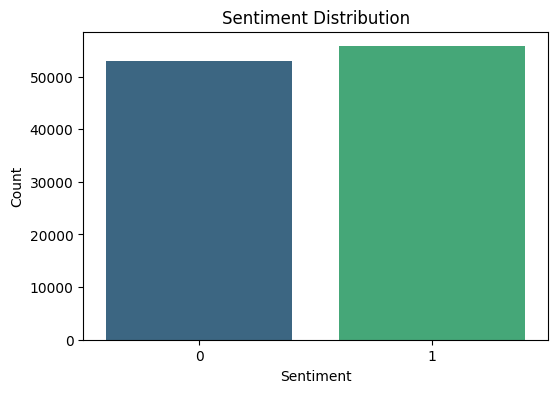

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


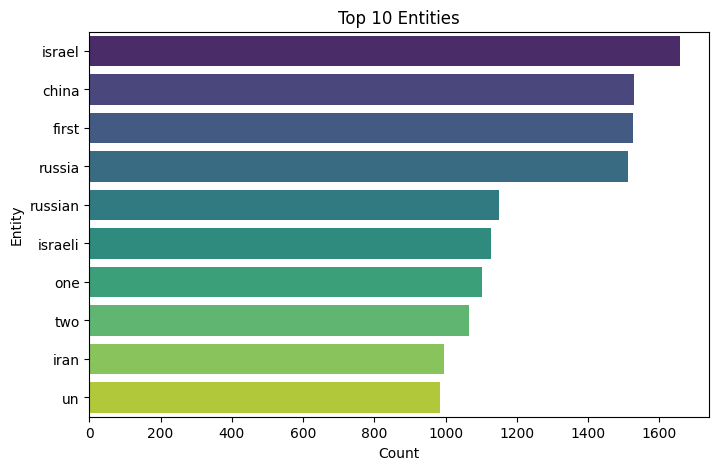

In [ ]:
from collections import Counter

# Flatten list of entities and count occurrences
all_entities = [entity[0] for entities in data['entities'] for entity in entities]
entity_counts = Counter(all_entities)

# Plot top 10 most common entities
top_entities = entity_counts.most_common(10)
entities, counts = zip(*top_entities)

plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts), y=list(entities), palette='viridis')
plt.title('Top 10 Entities')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.savefig('Top_entities.png')
plt.show()


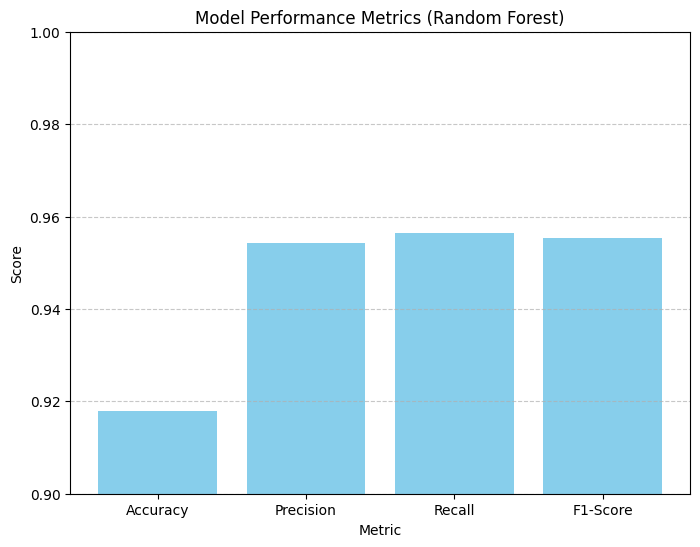

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for model performance metrics
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [0.917857, 0.954193, 0.956420, 0.955305]
}

# Create a DataFrame for the metrics
df_metrics = pd.DataFrame(metrics_data)

# Plot the metrics as a bar graph
plt.figure(figsize=(8, 6))
plt.bar(df_metrics["Metric"], df_metrics["Score"], color="skyblue")
plt.ylim(0.9, 1.0)  # Set y-axis limits for better visualization
plt.title("Model Performance Metrics (Random Forest)")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig('model_performance.png')
plt.show()

